<a href="https://colab.research.google.com/github/Pragya12358/CNN-Melanoma-Detection/blob/main/Pragya_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:

Actinic keratosis
Basal cell carcinoma
Dermatofibroma
Melanoma
Nevus
Pigmented benign keratosis
Seborrheic keratosis
Squamous cell carcinoma
Vascular lesion

## Importing Skin Cancer Data
### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, MaxPool2D

In [2]:

## mount the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Check for default google drive directory
!ls 
     

gdrive	sample_data


Data Summary
This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the root path for train and test images 
root_path = '/content/gdrive/My Drive/CNN-Melanoma-Detection'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [5]:

# Print the number of tran and test images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

1307
118


Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility.

Create a dataset
Define some parameters for the loader

In [6]:

batch_size = 32
img_height = 180
img_width = 180
     

In [7]:
## Load the train dataset, and use validation_split 0.2 while definiting
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
  )
     

Found 11307 files belonging to 9 classes.
Using 9046 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
  )
     

Found 11307 files belonging to 9 classes.
Using 2261 files for validation.


In [9]:
#check the tensor shape
print(train_ds)
print(val_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
# print the class available in dataset (dataset should consist of 9 classes)

# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)
     

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [11]:
# Define the test_ds from data_dir_test

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    image_size = (img_height, img_width),
    batch_size = batch_size
  )
     

Found 118 files belonging to 9 classes.


Visualize the data
Todo, create a code to visualize one instance of all the nine classes present in the dataset

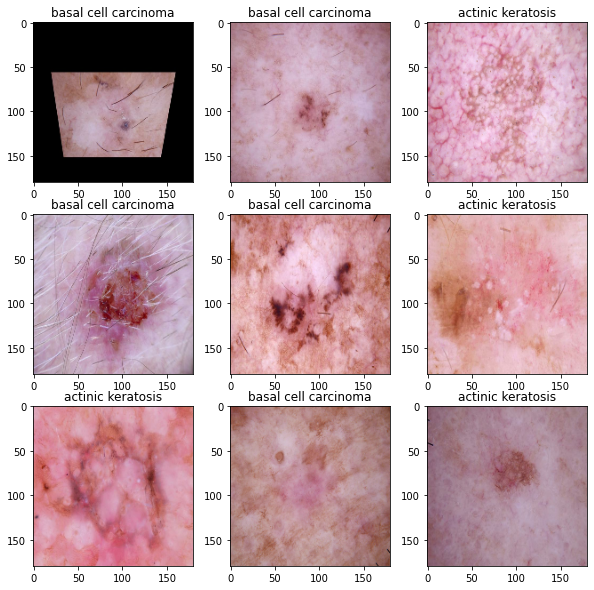

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    ax.set_title(class_names[labels[i]])
plt.show()

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Create the model
Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [14]:
# Rescale the image
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3))
]

input_shape = (180,180,3)
num_classes = 9

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape = input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape = input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Compile the model
Choose an appropirate optimiser and loss function for model training

In [15]:
### Todo, choose an appropriate optimiser and loss function
model.compile(
    optimizer ='adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)
     

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

Train the model

In [17]:
epochs = 20 
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


283/283 [==============================] - 903s 687ms/step - loss: 1.0423 - accuracy: 0.5251 - val_loss: 0.9000 - val_accuracy: 0.6320
Epoch 2/20
283/283 [==============================] - 21s 75ms/step - loss: 0.9035 - accuracy: 0.6234 - val_loss: 0.8348 - val_accuracy: 0.6754
Epoch 3/20
283/283 [==============================] - 21s 75ms/step - loss: 0.7682 - accuracy: 0.7185 - val_loss: 0.6989 - val_accuracy: 0.7514
Epoch 4/20
283/283 [==============================] - 21s 74ms/step - loss: 0.6358 - accuracy: 0.7722 - val_loss: 0.5208 - val_accuracy: 0.8288
Epoch 5/20
283/283 [==============================] - 21s 74ms/step - loss: 0.5023 - accuracy: 0.8355 - val_loss: 0.4899 - val_accuracy: 0.8443
Epoch 6/20
283/283 [==============================] - 21s 74ms/step - loss: 0.3860 - accuracy: 0.8760 - val_loss: 0.3926 - val_accuracy: 0.8775
Epoch 7/20
283/283 [==============================] - 21s 74ms/step - loss: 0.2823 - accuracy: 0.9106 - val_loss: 0.4585 - val_accuracy: 0.8717
E

Model overfit/under-fit (check the accuracy)?

In [18]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

71/71 [==============================] - 2s 25ms/step - loss: 0.5271 - accuracy: 0.9098
Accuracy:  0.9986734390258789
Validation Accuracy:  0.9097744226455688
Loss:  0.006809690967202187
Validation Loss 0.5271095037460327


Visualizing training results

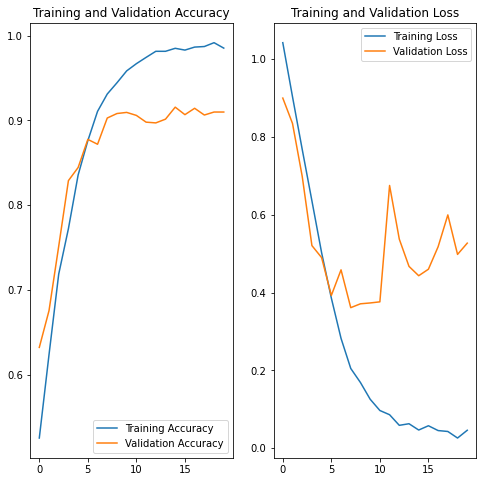

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
Initial findings
In 20 epochs, we can observe the training accuracy is around 83.92%, where as validation accuracy is 54.36%. In terms of training and validation loss, we can observe training loss continuous decreases where as validation loss decreases upto 10 epoch and followed by a sharp increase in loss.

Model is overfitting, as its calculated w.r.t. loss, and we can see the difference between loss in training and validation around 19-20th epoch; At the same we can notice training and validation accuracy

Handle overfitting (Data augmentation)
Data augmentation can be used in deep learning to handle overfitting. It can be used to generate more sample images by flipping or random rotation

In [20]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
from keras.preprocessing.image import ImageDataGenerator

data_aug = keras.Sequential([
       layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
       layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
       layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

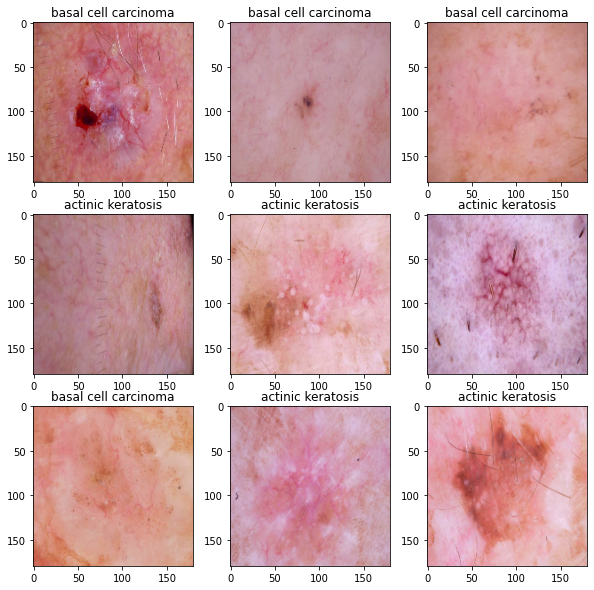

In [21]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, labels in  train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(data_aug(images)[i].numpy().astype("uint8"))
    ax.set_title(class_names[labels[i]])
plt.show()

Retraining the model by using Drop out layer to reduce overfitting

In [22]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
input_shape = (180,180,3)
num_classes = 9

model = Sequential([ data_aug,
   layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape = input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Compiling the model

In [23]:

## Your code goes here
model.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy']
)
     

In [24]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 90, 90, 64)        18496     
                                                      

Training the model

In [25]:
## Your code goes here
# Train model for more number of epochs to get better accuracy

epochs = 30
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/30
283/283 [==============================] - 28s 95ms/step - loss: 1.0363 - accuracy: 0.5159 - val_loss: 0.9638 - val_accuracy: 0.6201
Epoch 2/30
283/283 [==============================] - 27s 94ms/step - loss: 0.9513 - accuracy: 0.5903 - val_loss: 0.8507 - val_accuracy: 0.6272
Epoch 3/30
283/283 [==============================] - 26s 93ms/step - loss: 0.8723 - accuracy: 0.6538 - val_loss: 0.8940 - val_accuracy: 0.5997
Epoch 4/30
283/283 [==============================] - 26s 94ms/step - loss: 0.8012 - accuracy: 0.6931 - val_loss: 0.7158 - val_accuracy: 0.7218
Epoch 5/30
283/283 [==============================] - 27s 94ms/step - loss: 0.7710 - accuracy: 0.7077 - val_loss: 0.6634 - val_accuracy: 0.7461
Epoch 6/30
283/283 [==============================] - 26s 93ms/step - loss: 0.7198 - accuracy: 0.7307 - val_loss: 0.5985 - val_accuracy: 0.7846
Epoch 7/30
283/283 [==============================] - 27s 94ms/step - loss: 0.6332 - accuracy: 0.7696 - val_loss: 0.5721 - val_accuracy:

In [27]:

loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

71/71 [==============================] - 2s 25ms/step - loss: 0.3712 - accuracy: 0.8916
Accuracy:  0.8988503217697144
Validation Accuracy:  0.891640841960907
Loss:  0.32798948884010315
Validation Loss 0.3711690902709961


Visualizing the results

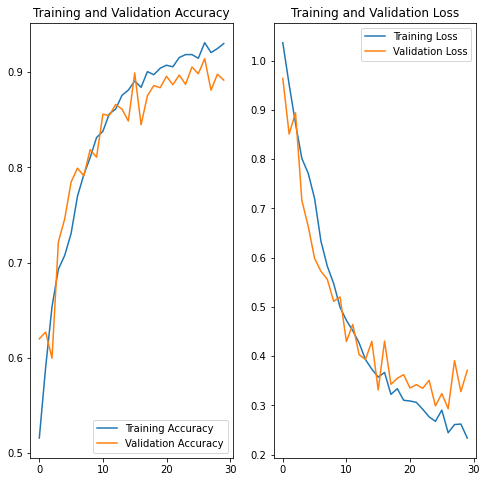

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings
With data augmentation strategy, we can see that training and validation accuracy fairly aligns and remain constant, where training and validation loss constantly decreases over period of time.

Though model accuracy has gone down, but model is not overfitting and requires more hyper parameter tuning. one of the option could be to train for more number of epocs and see the accuracy.

Todo: Find the distribution of classes in the training dataset.
Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

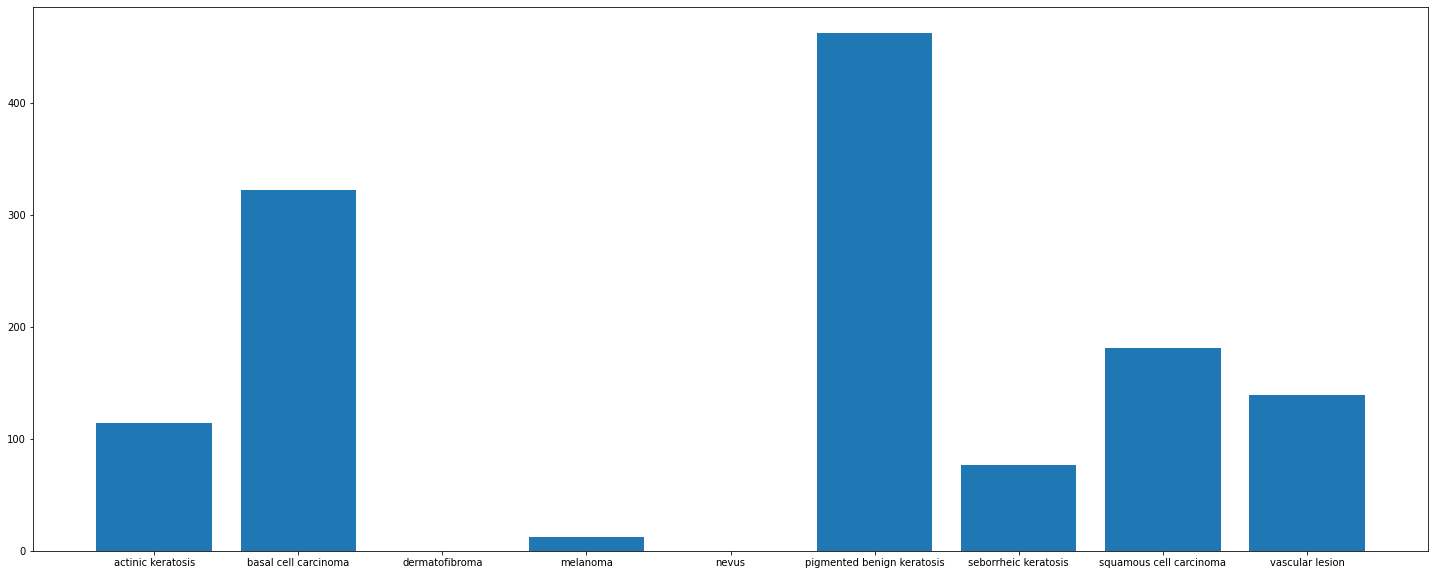

In [29]:
## Your code goes here.

count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

## Todo: Write your findings here:
- Which class has the least number of samples?
### class has least number of samples is 'seborrheic keratosis'
- Which classes dominate the data in terms proportionate number of samples?
### Class "pigmented benign keratosis" dominate the data in presence
## Todo: Rectify the class imbalance
### Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [30]:

!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
path_to_training_dataset= '/content/gdrive/My Drive/CNN-Melanoma-Detection/Train/' 
import Augmentor
for i in class_names:
   print(str(data_dir_train) +'/'+ i)
   

/content/gdrive/My Drive/CNN-Melanoma-Detection/Train/actinic keratosis
/content/gdrive/My Drive/CNN-Melanoma-Detection/Train/basal cell carcinoma
/content/gdrive/My Drive/CNN-Melanoma-Detection/Train/dermatofibroma
/content/gdrive/My Drive/CNN-Melanoma-Detection/Train/melanoma
/content/gdrive/My Drive/CNN-Melanoma-Detection/Train/nevus
/content/gdrive/My Drive/CNN-Melanoma-Detection/Train/pigmented benign keratosis
/content/gdrive/My Drive/CNN-Melanoma-Detection/Train/seborrheic keratosis
/content/gdrive/My Drive/CNN-Melanoma-Detection/Train/squamous cell carcinoma
/content/gdrive/My Drive/CNN-Melanoma-Detection/Train/vascular lesion


In [33]:
path_to_training_dataset= str(data_dir_train)
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + '/' + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN-Melanoma-Detection/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8AB64F7310>: 100%|██████████| 500/500 [00:19<00:00, 25.84 Samples/s]


Initialised with 322 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN-Melanoma-Detection/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8AB651AEB0>: 100%|██████████| 500/500 [00:17<00:00, 28.48 Samples/s]


Initialised with 0 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN-Melanoma-Detection/Train/dermatofibroma/output.

IndexError: ignored

In [34]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

11000


Lets see the distribution of augmented data after adding new images to the original training data.

In [35]:

from glob import glob

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/My Drive/CNN-Melanoma-Detection/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029141.jpg_2e10cda0-d06b-45ea-91eb-1e312951156b.jpg',
 '/content/gdrive/My Drive/CNN-Melanoma-Detection/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028370.jpg_7ba4dfd3-84b4-42e6-bf31-2f2ecfb8a4e0.jpg',
 '/content/gdrive/My Drive/CNN-Melanoma-Detection/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027562.jpg_13c128a9-f62e-464c-b591-87a027c492cb.jpg',
 '/content/gdrive/My Drive/CNN-Melanoma-Detection/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032854.jpg_95e6b8d1-0f9c-4b99-bda2-4aa7b916ce09.jpg',
 '/content/gdrive/My Drive/CNN-Melanoma-Detection/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026650.jpg_9e2de82c-d8fc-44e9-be2d-2aefe7ecbb5e.jpg',
 '/content/gdrive/My Drive/CNN-Melanoma-Detection/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031228.jpg_af3ec4a8-41df-4682-aff0-240c908309b

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

Todo: Train the model on the data created using Augmentor

In [40]:
batch_size = 32
img_height = 180
img_width = 180

Todo: Create a training dataset

In [41]:

data_dir_train = '/content/gdrive/My Drive/CNN-Melanoma-Detection/Train/'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 12307 files belonging to 9 classes.
Using 9846 files for training.


Todo: Create a validation dataset

In [42]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)
     

Found 12307 files belonging to 9 classes.
Using 2461 files for validation.


In [43]:

print(train_ds)
print(val_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


Todo: Create your model (make sure to include normalization)

In [44]:
## your code goes here

# Rescale the image
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3))
]

input_shape = (180,180,3)
num_classes = 9

# Use the batch normalization and drop out to check the model

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape = input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape = input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Todo: Compile your model (Choose optimizer and loss function appropriately)

In [45]:
## your code goes here
model.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy']
)
     

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                  

Todo: Train your model

In [47]:
epochs = 30 
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/30
308/308 [==============================] - 43s 136ms/step - loss: 1.0363 - accuracy: 0.4907 - val_loss: 0.9211 - val_accuracy: 0.5307
Epoch 2/30
308/308 [==============================] - 39s 126ms/step - loss: 0.8599 - accuracy: 0.6438 - val_loss: 0.8617 - val_accuracy: 0.6010
Epoch 3/30
308/308 [==============================] - 39s 126ms/step - loss: 0.7442 - accuracy: 0.7245 - val_loss: 0.6958 - val_accuracy: 0.7192
Epoch 4/30
308/308 [==============================] - 39s 124ms/step - loss: 0.6205 - accuracy: 0.7804 - val_loss: 0.5836 - val_accuracy: 0.8025
Epoch 5/30
308/308 [==============================] - 39s 124ms/step - loss: 0.5063 - accuracy: 0.8339 - val_loss: 0.5202 - val_accuracy: 0.8285
Epoch 6/30
308/308 [==============================] - 39s 124ms/step - loss: 0.3891 - accuracy: 0.8762 - val_loss: 0.3910 - val_accuracy: 0.8874
Epoch 7/30
308/308 [==============================] - 39s 124ms/step - loss: 0.2801 - accuracy: 0.9125 - val_loss: 0.4599 - val_ac

Model underfit/overfit (Check the accuracy)?

In [48]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)
     

77/77 [==============================] - 7s 86ms/step - loss: 0.6169 - accuracy: 0.9224
Accuracy:  0.9997968673706055
Validation Accuracy:  0.9223892688751221
Loss:  0.0016672196798026562
Validation Loss 0.6168538928031921


Todo: Visualize the model results

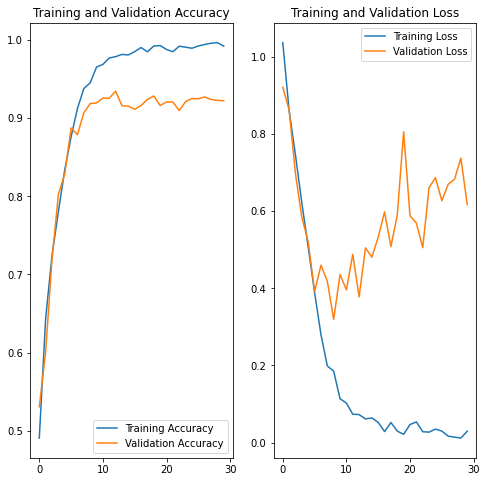

In [49]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

With class imbalance and generating some sample images, we can see that training and validation accuracy has gone up. Training accuracy has increased upto > 90% and validation accuracy is around 84%.

With more hyper parameter tunining, accuracy can be increased further.

#### Final summary
At first, model was overfitting with basic sample images where training accuracy was approx 91% and validation accuracy was 52%

With basic tuning and help of ImageDataGenerator we were able to train the sample further and model seems to perform better where training and validation accuracy both were close to 60%.

With class imbalance and generating more sample images, we could notice model improved further and training and validation accuracy both > 80%.

- With more hyper parameter tuning model can perform better.

